In [72]:
import numpy as np
import pandas as pd


In [73]:
df = pd.read_csv("../dataset/dataset_with_error.csv")

df

,Unnamed: 0,Point A,Point B,Point C,Point D,Point E,Error Classification
0,0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...,...
306,306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [74]:
df = df.drop('Unnamed: 0', axis=1)
df

,Point A,Point B,Point C,Point D,Point E,Error Classification
0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...
306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [75]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df.drop('Error Classification',axis=1)

y = df['Error Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [76]:
from sklearn.ensemble import RandomForestClassifier # classifier
est =5000
n_cores = -1

rf = RandomForestClassifier(n_estimators=est, oob_score=True, verbose=1, n_jobs=n_cores)

In [77]:
rf2 = rf.fit(X, y)
y_pred = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_j

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:    0.8s finished


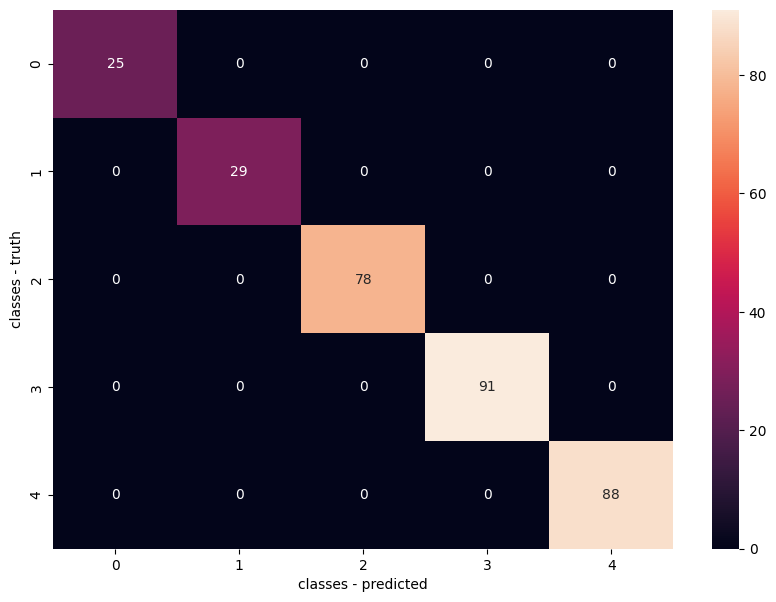

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


cm = confusion_matrix(y,rf.predict(X))
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('classes - predicted')
plt.ylabel('classes - truth')
plt.show()


In [79]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

In [80]:
score

1.0

## Accuracy 

In [85]:

print("Accuracy is: ",accuracy_score(y_test, y_pred)*100)

Accuracy is:  100.0


## Precision

In [86]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="weighted")
print('Precision: ',precision)

Precision:  1.0


## Recall

In [87]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average="weighted")
print('Recall: ',recall)

Recall:  1.0


## F1 Score

In [89]:
from sklearn.metrics import f1_score
f1_score = 2 * (precision * recall ) / (precision + recall)
print('F1 Score: ',f1_score)


F1 Score:  1.0


## Predictions from validations set



In [81]:
dfn = pd.read_csv("../dataset/validation_ds.csv")
df2 = pd.read_csv("../dataset/validation_ds.csv")
df2 = df2.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Error Classification', axis=1)
df2_pred = rf.predict(df2)
df2_pred


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:    0.5s finished


array(['B', 'A', 'A', 'C', 'E'], dtype=object)

In [84]:
score = accuracy_score(dfn['Error Classification'], df2_pred)
score

0.2